# <font color='red'>Regresión Lineal</font>

**significado**:
* un depto de 0 mts2 tendrá un precio de 86.96 euros
* por cada mt2, el valor aumentará 2.37 euros

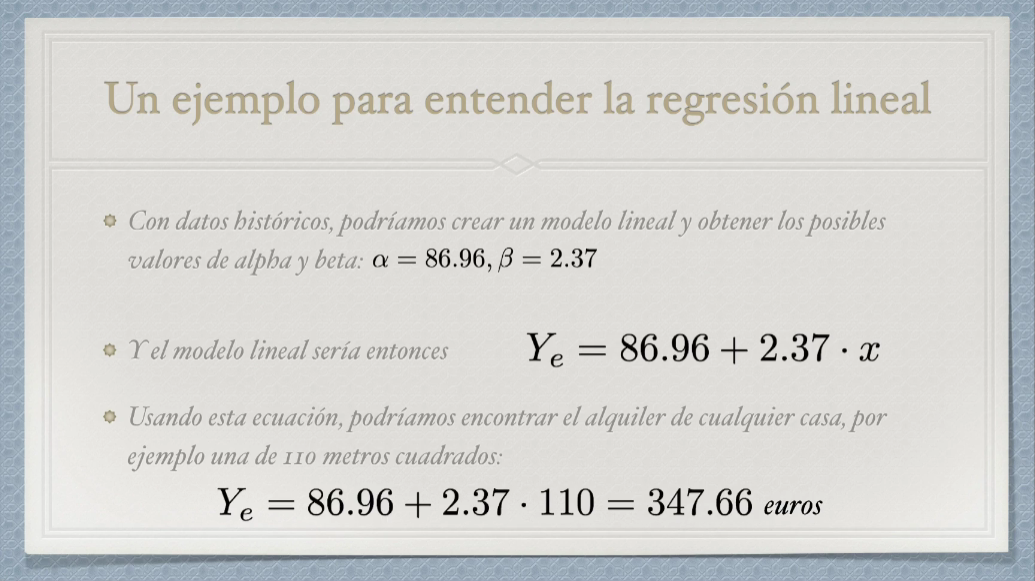

## ojo: los errores deberán seguir una distribución normal; de no ser así (por ej., una distribución logarítmica), el modelo puede NO ser lineal:

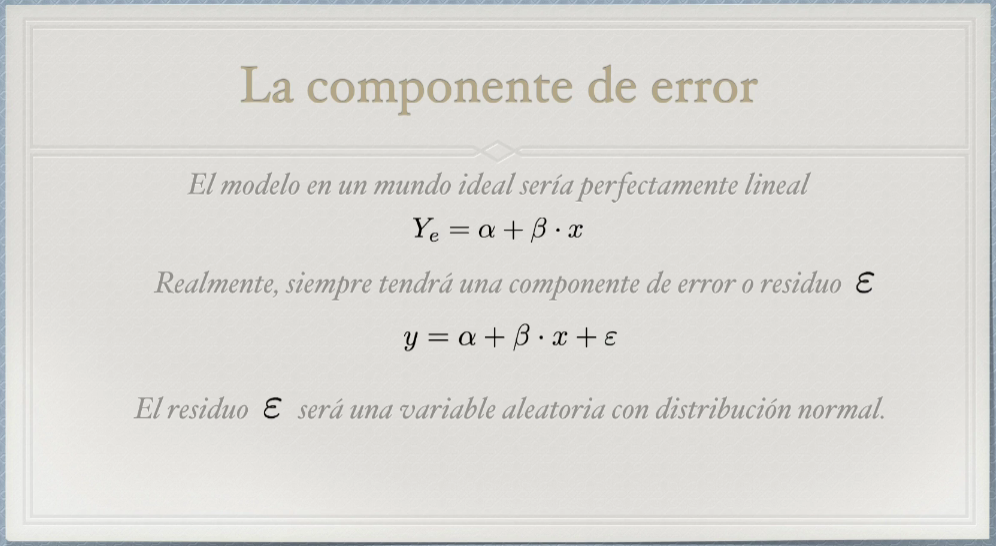

### gráfica del error:

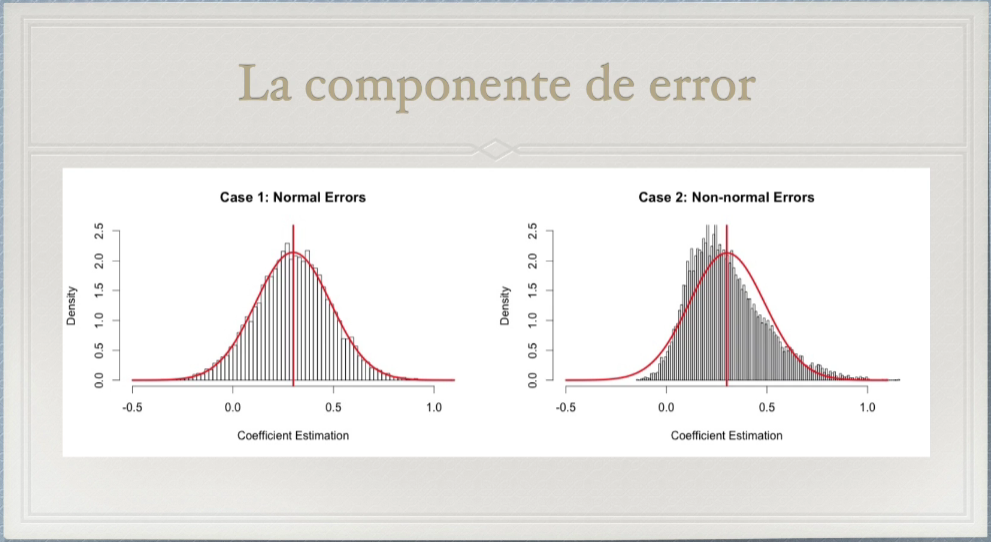

## Modelo con datos simulados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#desviación = 2.5
x = 1.5  + 2.5 * np.random.randn(100) #los datos
residuos = 0 + 0.8 * np.random.randn(100) #errores destribuidos

In [3]:
y_pred = 5 + 1.9 * x #realizo la predicción
y_act = 5 + 1.9 * x + residuos #creo los valores "y" reales, agregando los residuos (diferencias con y_pred)

In [4]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [5]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_act":y_act_list,
        "y_pred":y_pred_list
    }
)

In [6]:
data

,x,y_act,y_pred
0,3.395357,11.717383,11.451179
1,9.097192,21.588925,22.284665
2,-3.290202,-0.346705,-1.251385
3,4.019866,12.612641,12.637745
4,0.512297,5.514293,5.973364
...,...,...,...
95,3.226820,13.905407,11.130959
96,-0.704399,4.519781,3.661642
97,3.441909,10.691191,11.539627
98,-1.648611,2.949708,1.867639


In [7]:
#calculo el promedio de las y_act
y_mean =[np.mean(y_act) for i in range(1, len(y_act)+1)]
y_mean[0:10]

[8.078740979930856,
 8.078740979930856,
 8.078740979930856,
 8.078740979930856,
 8.078740979930856,
 8.078740979930856,
 8.078740979930856,
 8.078740979930856,
 8.078740979930856,
 8.078740979930856]

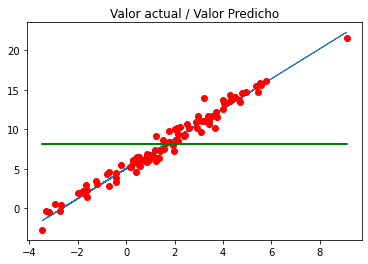

In [8]:
plt.plot(x, y_pred, lw=1)
plt.plot(x, y_act, 'ro')
plt.plot(x, y_mean, c='green') #ploteo la media
plt.title("Valor actual / Valor Predicho")
plt.show()

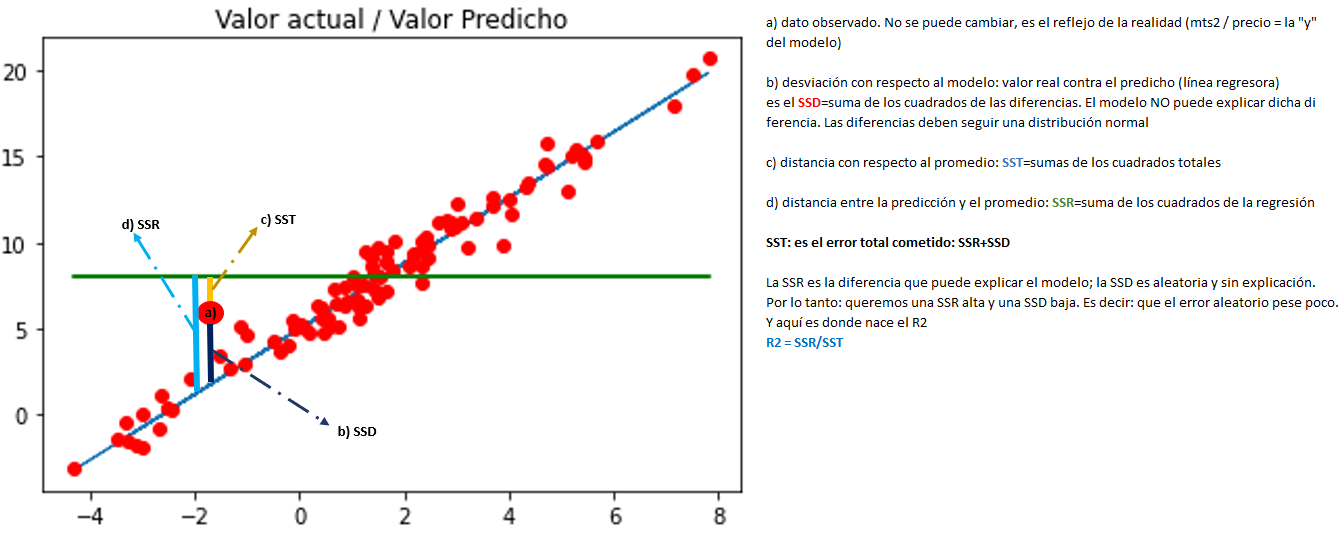

In [9]:
data['SSR'] = (data['y_pred'] - np.mean(data['y_act']))**2 #valor predicho menos la media del valor real
data['SSD'] = (data['y_pred'] - data['y_act'])**2 #valor predicho menos valor actual
data['SST'] = (data['y_act'] - np.mean(data['y_act']))**2 #valor actual menos la media del valor actual

In [10]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST
0,3.395357,11.717383,11.451179,11.373339,0.070864,13.239713
1,9.097192,21.588925,22.284665,201.808287,0.484054,182.525078
2,-3.290202,-0.346705,-1.251385,87.051244,0.818445,70.988140
3,4.019866,12.612641,12.637745,20.784516,0.000630,20.556249
4,0.512297,5.514293,5.973364,4.432610,0.210747,6.576395


In [11]:
SSR = sum(data['SSR'])
SSD = sum(data['SSD'])
SST = sum(data['SST'])

In [12]:
print("SSR: " , np.around(SSR, 2))
print("SSD: ", np.around(SSD, 2))
print("SST: ", np.around(SST, 2))
print("SSR+SSD: ", np.around(SSR+SSD,2))
print("R2 : ", np.around(SSR/SST,4))

SSR:  1952.51
SSD:  57.39
SST:  1969.93
SSR+SSD:  2009.9
R2 :  0.9912


## error estandar de los residuos (RSE):
es la deviación estandar de los residuos (SSD)

In [13]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7652348735627271

saco el promedio de la variable a predecir:

In [14]:
print(np.mean(data['y_act']))

8.078740979930856


In [15]:
print("El RSE es de {}, el promedio de 'y' es {}".format(RSE, np.mean(data['y_act'])))

El RSE es de 0.7652348735627271, el promedio de 'y' es 8.078740979930856


y así defino el % de error:

In [16]:
print("El % de error es del ", (RSE/np.mean(data['y_act']))*100)

El % de error es del  9.472204585636765


**graficando la distribución del error SSD**

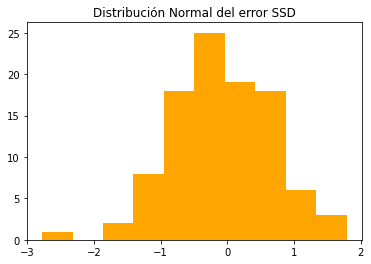

In [17]:
res = data['y_pred'] - data['y_act']
plt.hist(res, color='orange')
plt.title("Distribución Normal del error SSD")
plt.show()

## análisis:
* el R2 es alto
* el SSD es pequeño en comparación al SSR y SST
* la distribución del error de SSD presenta una distribució normal.
* <font color='red'>ES UN BUEN MODELO DE REGRESIÓN</font>

## obteniendo la recta de regresión:

* y = a + b * x
* b = sum((x-x.mean)-(y-y.mean))/sum((x-x.mean)^2)
* a = y.mean - b * x.mean

In [18]:
#calculo las respectivas medias
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y_act'])
x_mean, y_mean

(1.5860039924251492, 8.078740979930856)

In [19]:
#ahora defino la b:
#b = sum((x-x.mean)-(y-y.mean)) / sum((x-x.mean)^2)
data['beta_numerador'] = (data['x']-x_mean) * (data['y_act']-y_mean)
data['beta_denominador'] = (data['x']-x_mean)**2
b = sum(data['beta_numerador']) / sum(data['beta_denominador'])

In [20]:
# voy por a (alpha)
a = y_mean - b * x_mean

In [21]:
a, b

(5.095526586462718, 1.8809627262706463)

In [22]:
#el modelo de regresión manual obtenido es:
y = a + b * x
print(y)

[ 1.14820674e+01  2.22070062e+01 -1.09322157e+00  1.26567441e+01
  6.05913834e+00  6.70824051e+00  8.74392683e+00  6.18292186e+00
  2.79280608e+00  2.08535604e+00  6.89440228e+00 -4.08782069e-01
  5.88129986e+00  5.64544273e+00  7.20985507e+00  9.02522828e+00
  9.85827458e+00  1.51451791e+01  1.28088805e+01  4.59652772e-03
  1.27119321e+01  5.61528364e+00  9.13157245e+00  7.44184826e+00
  5.94998082e+00  7.45343500e+00  9.13977106e+00  1.13940436e+01
  6.69215544e+00  1.05058464e+01  7.62742889e+00  1.39644548e+01
  1.35130575e+01  6.19642175e+00  1.54752295e+01  1.44268187e+01
  2.86805010e+00  2.06507563e+00  1.53211626e+01  9.25918924e+00
  7.72130911e+00  6.11632852e+00  6.87782854e+00 -8.79404798e-01
  1.31953487e+01  9.60052247e+00  1.73267314e+00  1.15125333e+01
  1.41274924e+01  1.26168726e+01  4.27899870e+00  8.06161115e+00
  1.10049921e+01  1.21829443e+01 -1.41841924e+00  6.10882292e+00
  7.35031130e+00  6.72373697e+00  7.43690175e+00  9.05951403e+00
  4.66933694e+00  8.83347

## si beta = 0 (la pendiente es = 0), no hay relación entre las variables
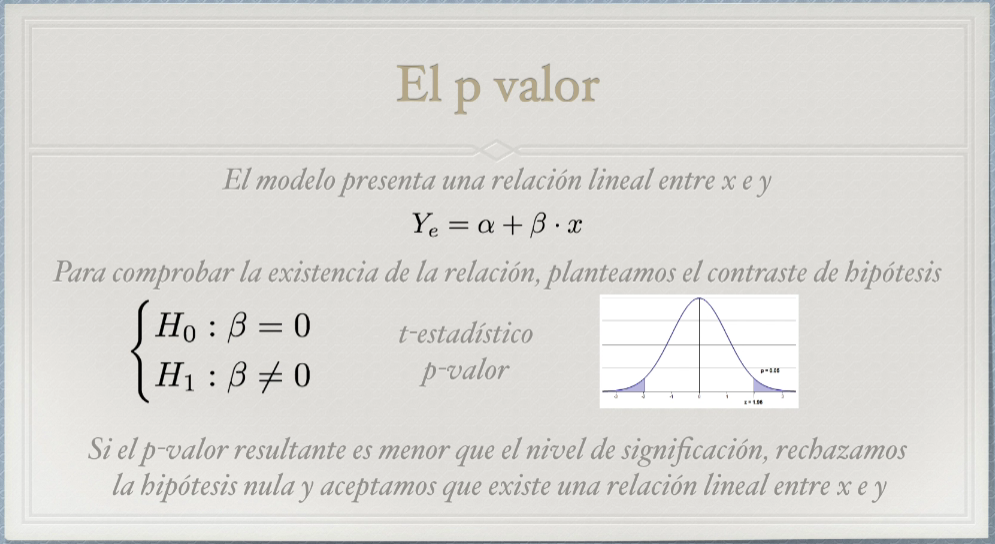